Обоснование удаления колонок по весу и росту

In [53]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("data/cleared_data.csv")

df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,...,0.08,NaN,NaN,False,False,True,True,True,32.8,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,...,0.21,NaN,NaN,True,True,True,True,True,28.9,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.10,NaN,NaN,True,True,True,True,True,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,...,0.15,NaN,NaN,True,True,True,True,True,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,...,0.14,NaN,NaN,False,False,True,True,True,32.8,0


In [55]:
df.dropna(subset=['comfort_rating']).shape

(129, 30)

In [56]:
df.shape

(372, 30)

In [57]:
df_h = df[['height', 'comfort_rating']].dropna()
df_w = df[['weight', 'comfort_rating']].dropna()
df_hw = df[['height', 'weight', 'comfort_rating']].dropna()

df_h.shape, df_w.shape, df_hw.shape

((92, 2), (92, 2), (92, 3))

In [58]:
sum(df_h['height'] != df_hw['height'])

0

In [59]:
sum(df_w['weight'] != df_hw['weight'])

0

=> пропуски в росте и весе встречаются одновременно

Помимо зависимости комфрота от роста и веса в отдельности, стоит проверить зависимость комфорта от [ИМТ (вес / рост^2)](https://gkb81.ru/sovety/kalkulyator-imt/)

In [60]:
df = df.dropna(subset=['height', 'weight', 'comfort_rating'])

In [61]:
df.shape

(92, 30)

In [62]:
df['IMT'] = df['weight'] / df['height'] ** 2 * 1e4

df[['height', 'weight', 'IMT']].head()

,height,weight,IMT
231,168.0,65.0,23.030045
232,163.0,53.0,19.948060
233,168.0,75.0,26.573129
235,173.0,70.0,23.388687
236,163.0,57.0,21.453574


In [63]:
df['IMT'].describe()

count    92.000000
mean     24.004095
std       3.447270
min      17.481790
25%      21.727946
50%      23.372162
75%      26.358821
max      33.950617
Name: IMT, dtype: float64

20107 аномальное значение, т.к даже при весе в 255кг и росте в 60 см, ИМТ = 708.3

In [64]:
df = df[df['IMT'] < 500]

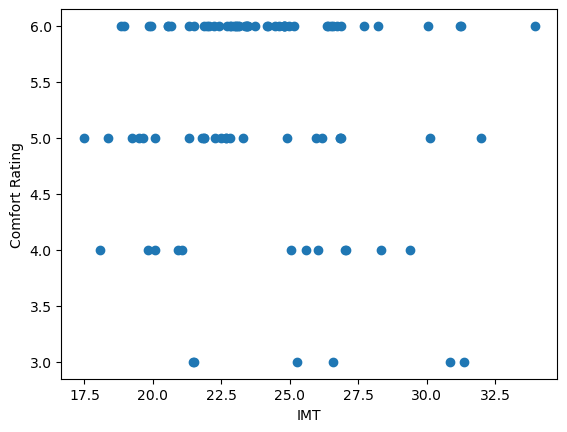

In [65]:
plt.scatter(df['IMT'], df['comfort_rating'])
plt.xlabel('IMT')
plt.ylabel('Comfort Rating')
plt.show()

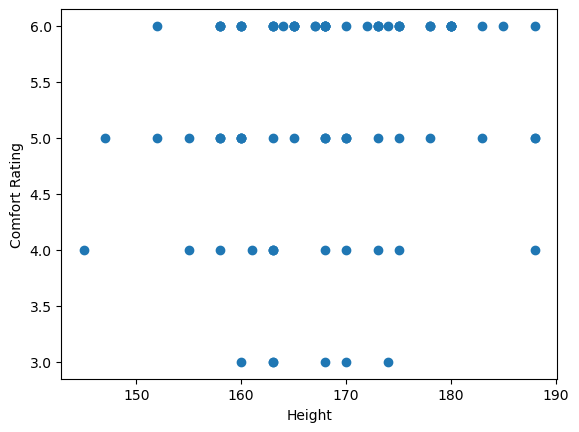

In [66]:
plt.scatter(df['height'], df['comfort_rating'])
plt.xlabel('Height')
plt.ylabel('Comfort Rating')
plt.show()

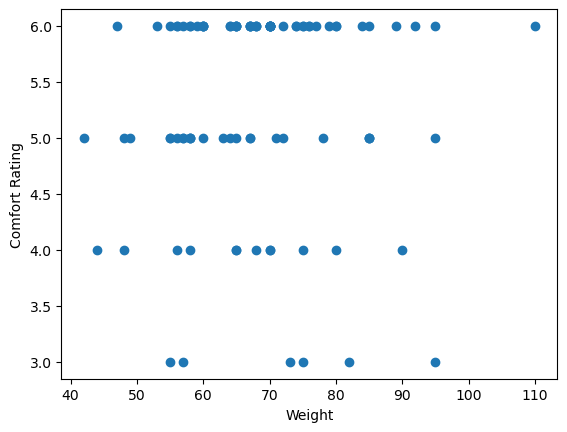

In [67]:
plt.scatter(df['weight'], df['comfort_rating'])
plt.xlabel('Weight')
plt.ylabel('Comfort Rating')
plt.show()

Как можно заметить, в каждой оценке присутствуют почти все категории веса, роста и ИМТ

Попробуем построить лин рег с ростом и весом, а так же без

In [68]:
df.isna().sum()

year                                    0
season                                  0
climate                                 0
city                                    0
country                                 0
cooling_method                          0
mixed_cooling_mode                      0
heating_method                          0
age                                     0
gender                                  0
temperature_feeling                     0
temperature_feeling_bool                0
preferred_temperature_change            0
air_movement_feeling_bool               0
preferred_air_movement_change           0
comfort_rating                          0
clothing_insulation                     0
indoor_air_temperature                  0
outdoor_air_temperature                92
relative_humidity                       0
air_speed                               0
height                                  0
weight                                  0
curtains                          

In [69]:
df = df.drop('outdoor_air_temperature', axis=1)
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,IMT
231,2012,Лето,Субтропическое высокогорье,Шимла,Индия,Вентиляция,not applicable,No mechanical heating,45,Мужской,...,168.0,65.0,True,True,False,True,True,18.5,0,23.030045
232,2012,Зима,Тропическая влажная саванна,Бангалор,Индия,Вентиляция,not applicable,No mechanical heating,35,Женский,...,163.0,53.0,True,False,True,True,True,29.9,0,19.948060
233,2012,Лето,Жаркий полузасушливый,Ахмедабад,Индия,Смешанный,Кондиционирование,No mechanical heating,35,Мужской,...,168.0,75.0,True,True,False,True,True,29.5,1,26.573129
235,2012,Лето,Субтропическое высокогорье,Шимла,Индия,Смешанный,Вентиляция,Механическое отопление,45,Женский,...,173.0,70.0,True,True,False,True,True,18.5,0,23.388687
236,2012,Лето,Субтропическое высокогорье,Шимла,Индия,Смешанный,Вентиляция,Механическое отопление,45,Мужской,...,163.0,57.0,True,True,False,True,True,18.5,0,21.453574


In [70]:
df.shape

(92, 30)

In [ ]:
df